In [1]:
print('importing')
import pandas as pd
print('done')

importing
done


In [2]:
FILENAME = 'metrics_comparison_test_skill.csv'


def print_df(df):
    # 'display.max_rows', None,
    with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False):
        print(df)


def get_metrics_df(filename):
    df = pd.read_csv(
        filename,
        sep=';',
        header=0,
        # index_col=0,
    )
    df.rename(columns={r'metric\method': 'metrics'}, inplace=True)
    return df

print('loading')

df = get_metrics_df(FILENAME)
print_df(df)

loading
             metrics   MVNN  CP_NN  LA_NN  QHGBR CP_HGBR     QR CP_LinReg CP_NN_skill LA_NN_skill CP_HGBR_skill CP_LinReg_skill
0                MAE  153,0  152,5  152,5  146,0   137,0  144,5     212,3      0,0031      0,0031         0,062           -0,47
1               RMSE  197,5  197,2  197,2  193,4   182,2  188,0     283,4      0,0018      0,0018         0,058           -0,51
2       SMAPE (x100)   1,20   1,19   1,19   1,13    1,07   1,12      1,68      0,0098      0,0098         0,057           -0,50
3               CRPS  111,2  108,4  108,2   95,1    99,2  103,5     152,8       0,025       0,028        -0,043           -0,48
4            PINBALL   56,4   55,2   55,1   52,3    50,4   52,7      78,0       0,020       0,022         0,036           -0,48
5                NLL   6,97   6,71   6,70   6,66    6,68   6,69      7,07       0,036       0,038       -0,0032          -0,056
6                SSR   0,68   0,90   0,97   0,82    0,80   0,93      1,05           x           

In [3]:
df2 = df.copy()
df2.index = df2.metrics
df2.drop(columns=['metrics'], inplace=True)
df2.drop(index=['SSR'], inplace=True)
df2.replace(r'(\d+),(\d+)', r'\1.\2', regex=True, inplace=True)  # convert to floats
df2 = df2.astype(float)
df2

,MVNN,CP_NN,LA_NN,QHGBR,CP_HGBR,QR,CP_LinReg,CP_NN_skill,LA_NN_skill,CP_HGBR_skill,CP_LinReg_skill
metrics,,,,,,,,,,,
MAE,153.00,152.50,152.50,146.00,137.00,144.50,212.30,0.0031,0.0031,0.0620,-0.470
RMSE,197.50,197.20,197.20,193.40,182.20,188.00,283.40,0.0018,0.0018,0.0580,-0.510
SMAPE (x100),1.20,1.19,1.19,1.13,1.07,1.12,1.68,0.0098,0.0098,0.0570,-0.500
CRPS,111.20,108.40,108.20,95.10,99.20,103.50,152.80,0.0250,0.0280,-0.0430,-0.480
PINBALL,56.40,55.20,55.10,52.30,50.40,52.70,78.00,0.0200,0.0220,0.0360,-0.480
NLL,6.97,6.71,6.70,6.66,6.68,6.69,7.07,0.0360,0.0380,-0.0032,-0.056
ABS 1-SSR,0.32,0.10,0.03,0.18,0.20,0.07,0.05,0.7000,0.9200,-0.0700,0.390
ABS MISCOV (%),12.40,2.90,1.20,6.80,5.00,5.30,1.80,0.7700,0.9000,0.2600,0.650
ABS MISCALIBR (%),13.60,5.70,5.50,3.90,3.20,5.10,3.80,0.5800,0.6000,0.1900,0.250


In [4]:
skills_dict = {col_name: col for col_name, col in df2.items()
               if col_name.endswith('_skill')}
skills_dict

{'CP_NN_skill': metrics
 MAE                  0.0031
 RMSE                 0.0018
 SMAPE (x100)         0.0098
 CRPS                 0.0250
 PINBALL              0.0200
 NLL                  0.0360
 ABS 1-SSR            0.7000
 ABS MISCOV (%)       0.7700
 ABS MISCALIBR (%)    0.5800
 Name: CP_NN_skill, dtype: float64,
 'LA_NN_skill': metrics
 MAE                  0.0031
 RMSE                 0.0018
 SMAPE (x100)         0.0098
 CRPS                 0.0280
 PINBALL              0.0220
 NLL                  0.0380
 ABS 1-SSR            0.9200
 ABS MISCOV (%)       0.9000
 ABS MISCALIBR (%)    0.6000
 Name: LA_NN_skill, dtype: float64,
 'CP_HGBR_skill': metrics
 MAE                  0.0620
 RMSE                 0.0580
 SMAPE (x100)         0.0570
 CRPS                -0.0430
 PINBALL              0.0360
 NLL                 -0.0032
 ABS 1-SSR           -0.0700
 ABS MISCOV (%)       0.2600
 ABS MISCALIBR (%)    0.1900
 Name: CP_HGBR_skill, dtype: float64,
 'CP_LinReg_skill': metrics
 MAE 

importing MPL
importing NP
CP_NN_skill
LA_NN_skill
CP_HGBR_skill
CP_LinReg_skill
saving
showing


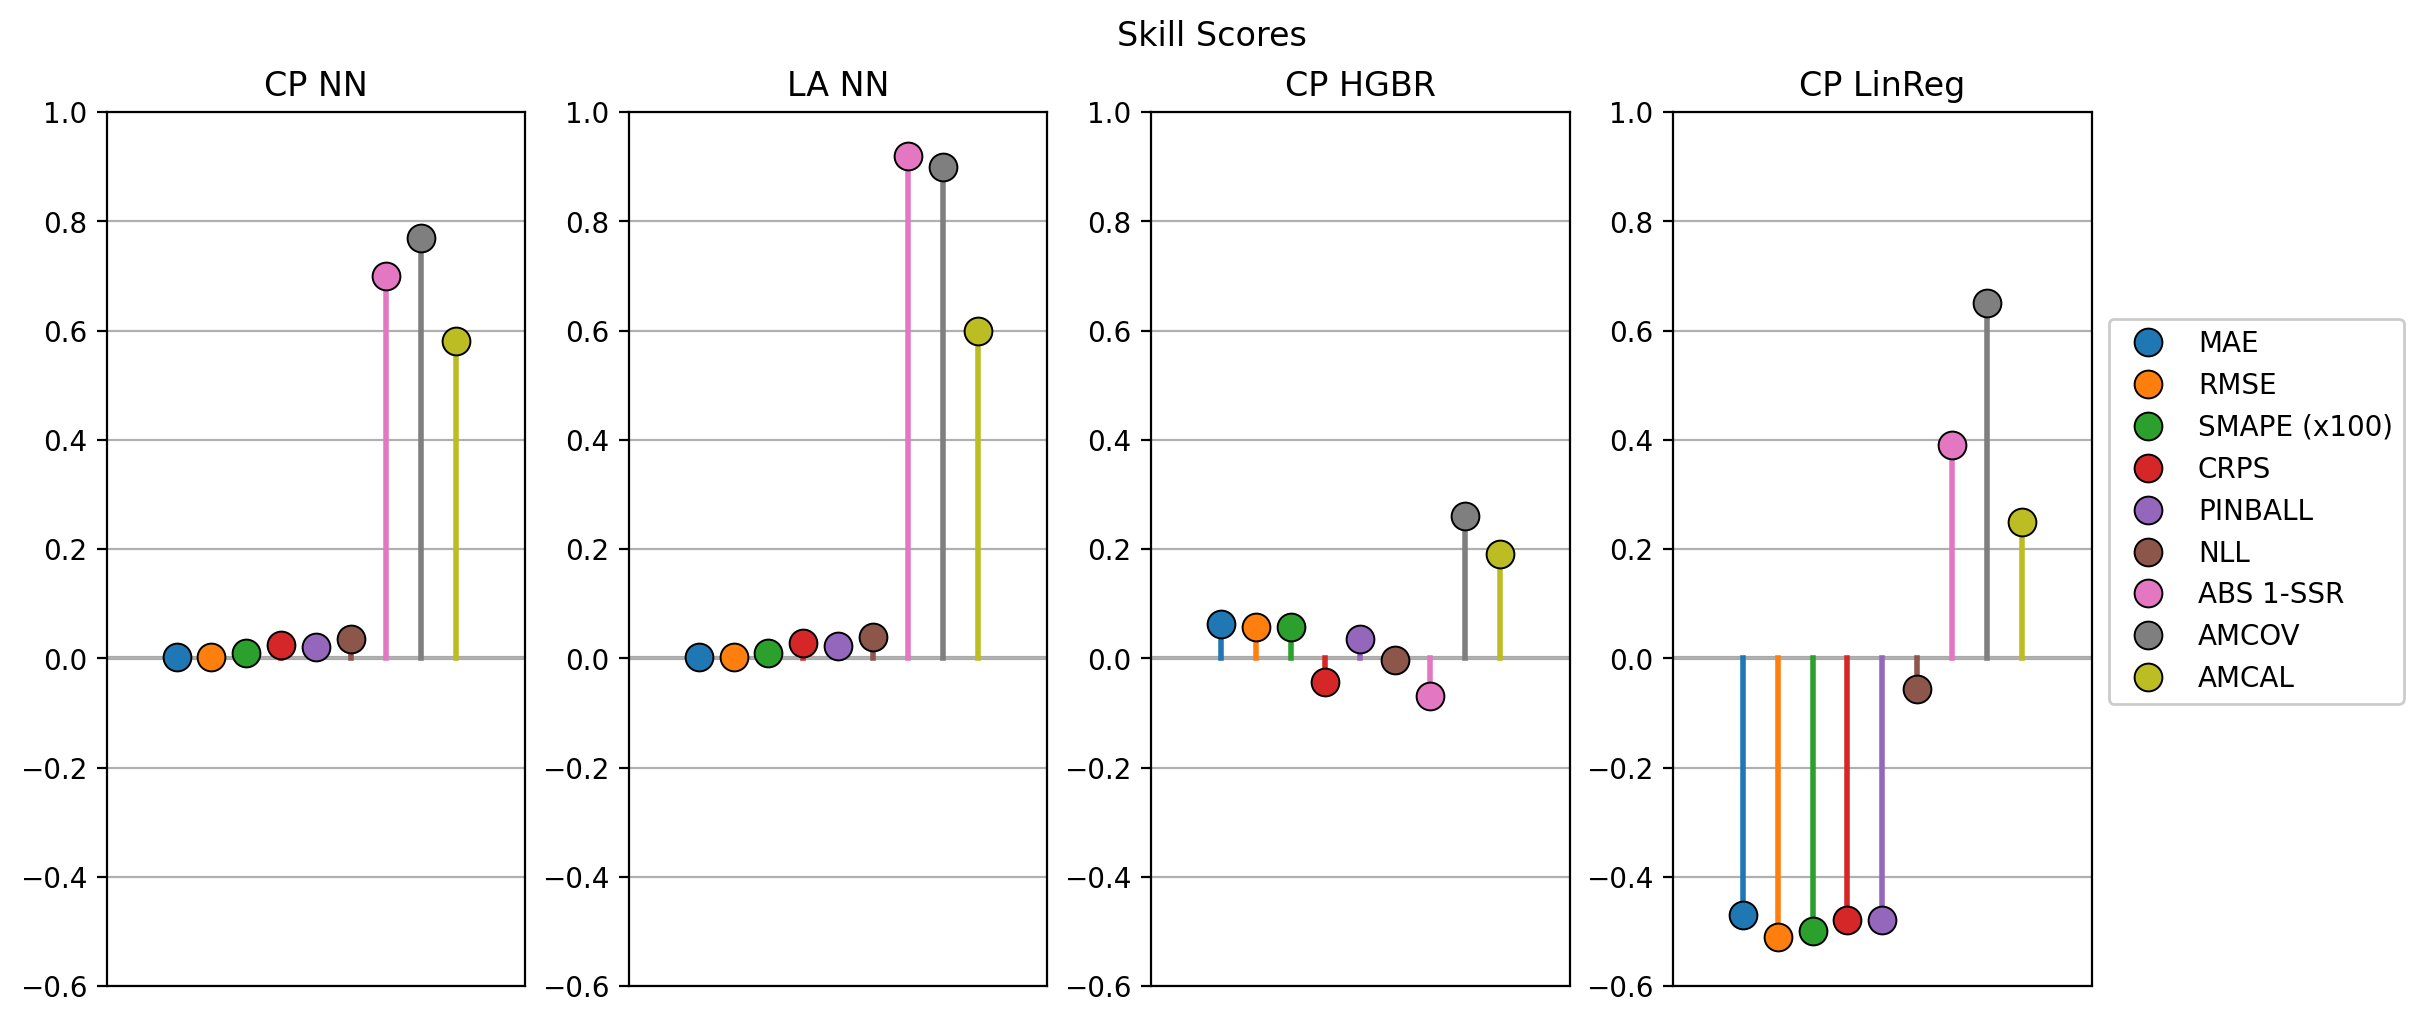

In [6]:
print('importing MPL')

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

print('importing NP')

import numpy as np


def _make_legend_elem(color, label):
    return Line2D([0], [0], marker='o', markerfacecolor=color, markeredgewidth=0.7, markeredgecolor=EDGECOLOR,
                  color='w', label=label, markersize=np.sqrt(SCATTER_SIZE), alpha=SCATTER_ALPHA)

def _clean_string(string, new_sep='_'):
    # remove skill postfix
    return new_sep.join(string.split('_')[:-1])

def _clean_metric(metric):
    if metric.startswith('ABS MISCOV'):
        metric = 'AMCOV'
    elif metric.startswith('ABS MISCALIBR'):
        metric = 'AMCAL'
    return metric
    

_scale = 2
SCATTER_SIZE = 10 **2
SCATTER_ALPHA = 1
X_SHIFT = _scale * 0.5
DPI = 200
SAVE_FIG = True
FIGURE_PATH = 'comparison_storage/plots/skill_plot.pdf'
MAX_POINT_SHIFT = _scale * 1.0
Y_LIM_SHIFT = 0.1
EDGECOLOR = 'black'
BARLINE_WIDTH = 2

fig, axs = plt.subplots(1, len(skills_dict), figsize=(12, 5), layout='constrained', dpi=DPI)
fig.suptitle('Skill Scores')

x_plot = _scale * np.array([-1, +1])
xlim_bottom, xlim_top = x_plot.min() - X_SHIFT, x_plot.max() + X_SHIFT
for ax, (method, method_skills) in zip(axs, skills_dict.items()):
    print(method)
    
    COLORS = mcolors.TABLEAU_COLORS.keys()
    
    point_shifts = np.linspace(-MAX_POINT_SHIFT, +MAX_POINT_SHIFT, len(df2.index))
    
    ax.set_title(_clean_string(method, new_sep=' '))
    ax.grid()
    ax.set_axisbelow(True)
    ax.set_xlim(xlim_bottom, xlim_top)
    ax.set_xticks([], [])

    for method_skill, color, point_shift in zip(method_skills, COLORS, point_shifts):
        ax.plot([point_shift]*2, [0, method_skill], color=color, zorder=2, linewidth=BARLINE_WIDTH)
        ax.scatter(point_shift, method_skill, color=color, s=SCATTER_SIZE, alpha=SCATTER_ALPHA, edgecolor=EDGECOLOR, linewidths=0.7, zorder=3)
    
    ax.axhline(y=0, color='darkgrey', zorder=0, linestyle='-')

    ax.set_ylim(bottom=-0.6, top=1.0)
    # break


legend_elements = [_make_legend_elem(color, _clean_metric(metric))
                   for metric, color in zip(method_skills.keys(), COLORS)]
bbox_to_anchor = (7.75/10, 8.9/10)
loc='center'
fig.legend(handles=legend_elements,
           # bbox_to_anchor=bbox_to_anchor,
           loc='outside center right',
           framealpha=1)

# fig.legend(df2.index, loc='outside center right')

if SAVE_FIG:
    print('saving')
    figure_path = FIGURE_PATH
    plt.savefig(figure_path)
print('showing')
plt.show()